In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Specify the SNOwGLoBES directory

In [2]:
sDir = '/Users/yuntse/work/supernova/SNOwGLoBES'
sDir += '/xscns'

In [3]:
fNueAr = '%s/xs_nue_Ar40_marley.dat' % sDir
faNueAr = '%s/xs_nuebar_Ar40.dat' % sDir
fcohAr = '%s/xs_coh_nc_Ar40.dat' % sDir
fNuE = '%s/xs_nue_e.dat' % sDir
fNCNuAr = '%s/xs_nc_nue_Ar40.dat' % sDir
fIBD = '%s/xs_ibd.dat' % sDir

Load the cross sections

In [4]:
XSNueAr = pd.read_csv( fNueAr, header = None, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'anue', 'anumu', 'anutau'])
XSaNueAr = pd.read_csv( faNueAr, header = None, skiprows = 3, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'anue', 'anumu', 'anutau'])
XScohAr = pd.read_csv( fcohAr, header = None, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'anue', 'anumu', 'anutau'])
XSNuE = pd.read_csv( fNuE, header = None, skiprows = 3, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'anue', 'anumu', 'anutau'])
XSNCNuAr = pd.read_csv( fNCNuAr, header = None, skiprows = 3, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'anue', 'anumu', 'anutau'])
XSIBD = pd.read_csv( fIBD, header = None, skiprows = 3, sep = r'\s+', names = ['E', 'nue', 'numu', 'nutau', 'anue', 'anumu', 'anutau'])

The unit of cross section is 1e-38 cm^2

In [5]:
FAC = 1e-38

The format of the energy is log10(E) in GeV.  Now make the energy in the unit of GeV

In [6]:
XSNueAr['E'] = 10**XSNueAr['E']
XSaNueAr['E'] = 10**XSaNueAr['E']
XScohAr['E'] = 10**XScohAr['E']
XSNuE['E'] = 10**XSNuE['E']
XSNCNuAr['E'] = 10**XSNCNuAr['E']
XSIBD['E'] = 10**XSIBD['E']

Make plots \
Note that the cross section is stored as cross section/E.  We need to multiply each cross section by its energy. \
Confirmed &nu;<sub>&mu;</sub>-e and &nu;<sub>&tau;</sub>-e are identical.  Same as the antineutrinos.

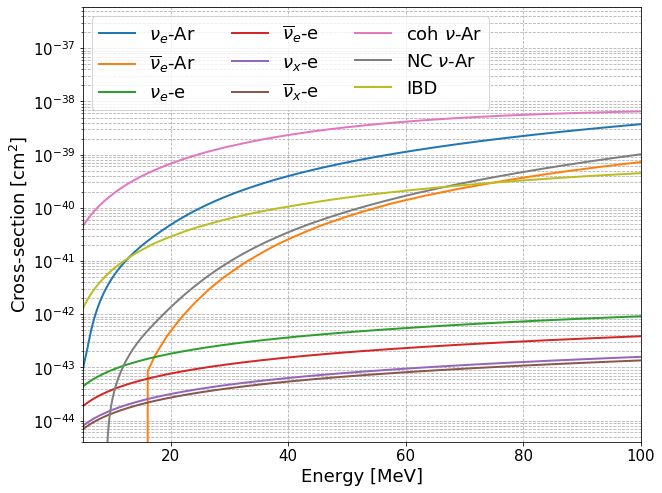

In [7]:
plt.figure(figsize = (10,8))
plt.plot(XSNueAr['E']*1000, XSNueAr['E']*XSNueAr['nue']*FAC, label = r'$\nu_e$-Ar', lw = 2)
plt.plot(XSaNueAr['E']*1000, XSaNueAr['E']*XSaNueAr['anue']*FAC, label = r'$\overline{\nu}_e$-Ar', lw = 2)
plt.plot(XSNuE['E']*1000, XSNuE['E']*XSNuE['nue']*FAC, label = r'$\nu_e$-e', lw = 2)
plt.plot(XSNuE['E']*1000, XSNuE['E']*XSNuE['anue']*FAC, label = r'$\overline{\nu}_e$-e', lw = 2)
plt.plot(XSNuE['E']*1000, XSNuE['E']*XSNuE['numu']*FAC, label = r'$\nu_x$-e', lw = 2)
plt.plot(XSNuE['E']*1000, XSNuE['E']*XSNuE['anumu']*FAC, label = r'$\overline{\nu}_x$-e', lw = 2)
plt.plot(XScohAr['E']*1000, XScohAr['E']*XScohAr['nue']*FAC, label = r'coh $\nu$-Ar', lw = 2)
plt.plot(XSNCNuAr['E']*1000, XSNCNuAr['E']*XSNCNuAr['nue']*FAC, label = r'NC $\nu$-Ar', lw = 2)
plt.plot(XSIBD['E']*1000, XSIBD['E']*XSIBD['anue']*FAC, label = 'IBD', lw = 2)

plt.legend(loc='upper left', ncol = 3, fontsize = 18)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(which = "both", linestyle = '--')
plt.xlabel('Energy [MeV]', fontsize = 18)
plt.ylabel(r'Cross-section [cm$^2$]', fontsize = 18)

plt.semilogy()
plt.xlim(5, 100)
plt.ylim(4e-45, 6e-37)
plt.show()

NC &nu;-Ar cross sections don't look the same as the SNOwGLoBES document, while the rest looks good.